# Задание 7

Давайте рассчитаем ещё один полезный показатель, характеризующий качество работы курьеров.

Задание:

На основе данных в таблице courier_actions для каждого дня рассчитайте, за сколько минут в среднем курьеры доставляли свои заказы.

Колонку с показателем назовите minutes_to_deliver. Колонку с датами назовите date. При расчёте среднего времени доставки округляйте количество минут до целых значений. Учитывайте только доставленные заказы, отменённые заказы не учитывайте.

Результирующая таблица должна быть отсортирована по возрастанию даты.

Поля в результирующей таблице: date, minutes_to_deliver

```sql
SELECT
  time :: date AS date,
  avg(time_to_deliver) :: int AS minutes_to_deliver
FROM
  (
    SELECT
      *,
      EXTRACT(
        EPOCH
        FROM
          (
            time - lag(time, 1) OVER(
              PARTITION BY order_id
              ORDER BY
                time
            )
          )
      ) / 60 AS time_to_deliver
    FROM
      courier_actions
    WHERE
      order_id NOT IN (
        SELECT
          order_id
        FROM
          user_actions
        WHERE
          action = 'cancel_order'
      )
  ) AS subq
GROUP BY
  1
ORDER BY
  1
```

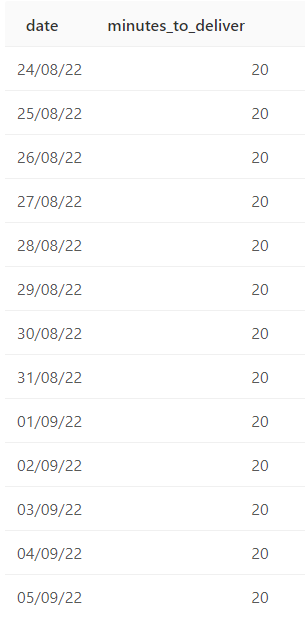

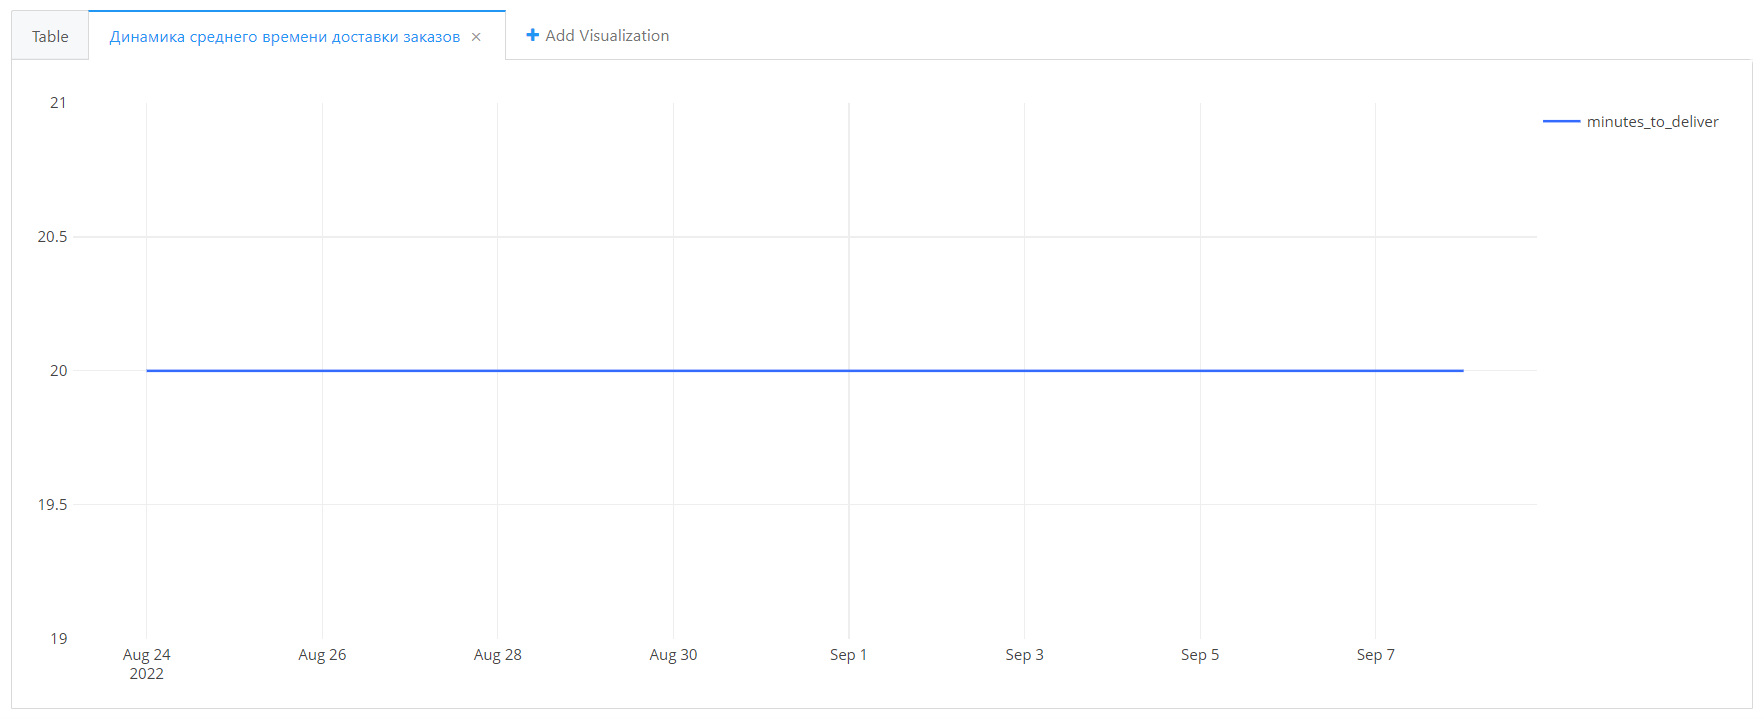